In [1]:
import sys
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import load_model
import helper_functions as f

2023-07-26 18:54:43.952318: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-26 18:54:44.851652: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
wireplane = 'V'

In [3]:
model_5_10_mean = np.load('../models_scales/mean_5_10' + wireplane + '_nu.npy')
model_5_10_std = np.load('../models_scales/scale_5_10' + wireplane + '_nu.npy')

model_5_15_mean = np.load('../models_scales/mean_5_15' + wireplane + '_nu.npy')
model_5_15_std = np.load('../models_scales/scale_5_15' + wireplane + '_nu.npy')

model_5_18_mean = np.load('../models_scales/mean_5_18' + wireplane + '_nu.npy')
model_5_18_std = np.load('../models_scales/scale_5_18' + wireplane + '_nu.npy')

model_60k_mean = np.load('../models_scales/mean_60k' + wireplane + '_nu.npy')
model_60k_std = np.load('../models_scales/scale_60k' + wireplane + '_nu.npy')

In [4]:
scalers = [[model_5_10_mean, model_5_10_std], [model_5_15_mean, model_5_15_std], 
           [model_5_18_mean, model_5_18_std], [model_60k_mean, model_60k_std]]

In [5]:
model_5_10 = load_model('../ROI_ar39_models/model_5_10' + wireplane + 'plane_nu_ROI.h5')

model_5_15 = load_model('../ROI_ar39_models/model_5_15' + wireplane + 'plane_nu_ROI.h5')

model_5_18 = load_model('../ROI_ar39_models/model_5_18' + wireplane + 'plane_nu_ROI.h5')

model_60k = load_model('../ROI_ar39_models/model_60k' + wireplane + 'plane_nu_ROI.h5')

2023-07-26 18:54:47.753924: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-26 18:54:47.788873: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-26 18:54:47.789210: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
models = [model_5_10, model_5_15, model_5_18, model_60k]

In [7]:
noise_path = '/home/vlian/Workspace/noise_100k_for_test/V/'
noise_filenames = sorted([f for f in listdir(noise_path) if (isfile(join(noise_path, f)) and wireplane in f)])
combined_noise = np.concatenate([np.load(noise_path+fname, mmap_mode='r') for fname in noise_filenames])

noise_waveforms = f.get_std_waveforms(combined_noise, 200)
roi_truth_noise = np.zeros(noise_waveforms.shape[0]) # for autoencoder
print(noise_waveforms.shape, roi_truth_noise.shape)

(100000, 200) (100000,)


In [8]:
def eval_model(idx):
    model_idx = idx

    noise_scaled = (noise_waveforms-scalers[model_idx][0])/scalers[model_idx][1]
    infer = models[model_idx].predict(noise_scaled)
    
    print((1-(len([i for i in infer if i >= 0.94])/len(infer)))*100)

In [9]:
for i in range(4):
    print('model:', i)
    eval_model(i)

model: 0


2023-07-26 18:54:52.732163: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


3125/3125 [==============================] - 6s 1ms/step
99.53999999999999
model: 1
3125/3125 [==============================] - 4s 1ms/step
99.544
model: 2
3125/3125 [==============================] - 4s 1ms/step
99.625
model: 3
3125/3125 [==============================] - 4s 1ms/step
99.675


In [10]:
dataset_adc_5_16 = np.load('/home/vlian/Workspace/ar39_samples/adc_5_16_V.npz', allow_pickle=True)

In [11]:
adc_5 = dataset_adc_5_16['adc_5']
adc_6 = dataset_adc_5_16['adc_6']
adc_7 = dataset_adc_5_16['adc_7']
adc_8 = dataset_adc_5_16['adc_8']
adc_9 = dataset_adc_5_16['adc_9']
adc_10 = dataset_adc_5_16['adc_10']
adc_11 = dataset_adc_5_16['adc_11']
adc_12 = dataset_adc_5_16['adc_12']
adc_13 = dataset_adc_5_16['adc_13']
adc_14 = dataset_adc_5_16['adc_14']
adc_15 = dataset_adc_5_16['adc_15']
adc_16 = dataset_adc_5_16['adc_16']

In [12]:
def cut_data(adc_group, type_):
    if type_:
        num_samples = 100000
    else:
        num_samples = 60000
    
    x = adc_group[0][0:num_samples]
    y = adc_group[1][0:num_samples]
    
    print(x.shape, y.shape)
    
    return x, y

In [13]:
adc_5_x, adc_5_y = cut_data(adc_5, True)
adc_6_x, adc_6_y = cut_data(adc_6, True)
adc_7_x, adc_7_y = cut_data(adc_7, True)
adc_8_x, adc_8_y = cut_data(adc_8, True)
adc_9_x, adc_9_y = cut_data(adc_9, True)
adc_10_x, adc_10_y = cut_data(adc_10, True)
adc_11_x, adc_11_y = cut_data(adc_11, True)
adc_12_x, adc_12_y = cut_data(adc_12, True)
adc_13_x, adc_13_y = cut_data(adc_13, True)

adc_14_x, adc_14_y = cut_data(adc_14, True)
adc_15_x, adc_15_y = cut_data(adc_15, True)
adc_16_x, adc_16_y = cut_data(adc_16, True)

(100000, 200) (100000, 200)
(100000, 200) (100000, 200)
(100000, 200) (100000, 200)
(100000, 200) (100000, 200)
(100000, 200) (100000, 200)
(100000, 200) (100000, 200)
(100000, 200) (100000, 200)
(100000, 200) (100000, 200)
(100000, 200) (100000, 200)
(100000, 200) (100000, 200)
(78346, 200) (78346, 200)
(54758, 200) (54758, 200)


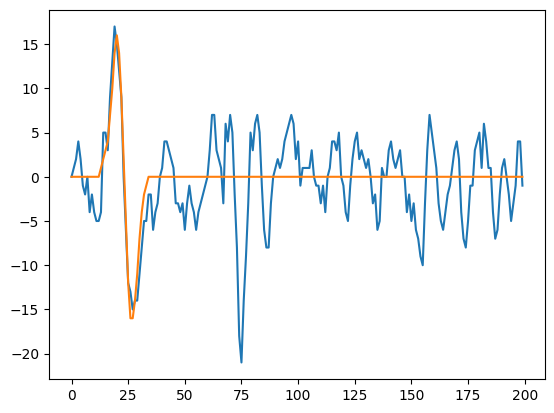

In [14]:
plt.plot(adc_16_x[100])
plt.plot(adc_16_y[100])

In [15]:
signals_per_adc = [adc_5_x, adc_6_x, adc_7_x, adc_8_x, adc_9_x, adc_10_x, adc_11_x, adc_12_x, adc_13_x, adc_14_x, adc_15_x, adc_16_x]

In [16]:
def eval_model_adc(adc_group_waveforms, model_idx):

    waveforms_scaled = (adc_group_waveforms-scalers[model_idx][0])/scalers[model_idx][1]
    infer = models[model_idx].predict(waveforms_scaled, verbose=0)
    
    print((len([i for i in infer if i >= 0.94])/len(infer))*100)

In [17]:
for i, signals_at_adc in enumerate(signals_per_adc):
    print('adc:', i+5)
    for j in range(4):
        print('    model:', j) 
        eval_model_adc(signals_at_adc, j)
    print('--------------')
    print()

adc: 5
    model: 0
4.84
    model: 1
4.852
    model: 2
4.399
    model: 3
4.02
--------------

adc: 6
    model: 0
8.797
    model: 1
8.834999999999999
    model: 2
8.013
    model: 3
7.534000000000001
--------------

adc: 7
    model: 0
15.189
    model: 1
15.315000000000001
    model: 2
14.222000000000001
    model: 3
13.483
--------------

adc: 8
    model: 0
23.966
    model: 1
24.121000000000002
    model: 2
22.724
    model: 3
21.712
--------------

adc: 9
    model: 0
34.719
    model: 1
35.134
    model: 2
33.562999999999995
    model: 3
32.317
--------------

adc: 10
    model: 0
47.124
    model: 1
47.804
    model: 2
46.171
    model: 3
44.833
--------------

adc: 11
    model: 0
59.194
    model: 1
59.974000000000004
    model: 2
58.412
    model: 3
57.145999999999994
--------------

adc: 12
    model: 0
70.165
    model: 1
71.202
    model: 2
69.8
    model: 3
68.648
--------------

adc: 13
    model: 0
79.482
    model: 1
80.444
    model: 2
79.465
    model: 3
78.526
-

In [18]:
adc_5_16_x = np.empty((0,200))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_5_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_6_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_7_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_8_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_9_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_10_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_11_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_12_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_13_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_14_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_15_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_16_x))

In [19]:
for i in range(10):
    adc_5_16_x = shuffle(adc_5_16_x)

In [ ]:
for j in range(4):
    print('    model:', j) 
    eval_model_adc(adc_5_16_x, j)

    model: 0
48.93875584235869
    model: 1
49.4881317160649
    model: 2
48.40826614326664
    model: 3


In [ ]:
orig_model = load_model('../../ROI_models/model_Vplane_nu_ROI.h5')
mean = np.load('../../ROI_models/mean_V_nu_ROI.npy')
std = np.load('../../ROI_models/scale_V_nu_ROI.npy')

In [ ]:
def eval_model_adc_orig(adc_group_waveforms):

    waveforms_scaled = (adc_group_waveforms-mean)/std
    infer = orig_model.predict(waveforms_scaled, verbose=0)
    
    print((len([i for i in infer if i >= 0.94])/len(infer))*100)

In [ ]:
for i, signals_at_adc in enumerate(signals_per_adc):
    print('adc:', i+5)
    eval_model_adc_orig(signals_at_adc)
    print('--------------')

In [ ]:
eval_model_adc_orig(adc_5_16_x)

In [ ]:
eval_model_adc_orig(noise_waveforms)

In [ ]:
100-(0.135)

# AE_TEST

In [ ]:
model_5_10_AE = load_model('../AE_ar39_models/model_5_10' + wireplane + 'plane_nu_AE.h5')

model_5_15_AE = load_model('../AE_ar39_models/model_5_15' + wireplane + 'plane_nu_AE.h5')

model_5_18_AE = load_model('../AE_ar39_models/model_5_18' + wireplane + 'plane_nu_AE.h5')

model_60k_AE = load_model('../AE_ar39_models/model_60k' + wireplane + 'plane_nu_AE.h5')

In [ ]:
cln_signals_per_adc = [adc_5_y, adc_6_y, adc_7_y, adc_8_y, adc_9_y, adc_10_y, adc_11_y, adc_12_y, adc_13_y, adc_14_y, adc_15_y, adc_16_y]

In [ ]:
def roi_ae(roi_model, ae_model, roi_scalers, ae_scalers, adc_idx, num_pred):
    waveform_noisy = signals_per_adc[adc_idx]
    noisy_wave_scaled_ROI = (waveform_noisy-roi_scalers[0])/roi_scalers[1]
    noisy_wave_scaled_AE = (waveform_noisy-ae_scalers[0])/ae_scalers[1]
    
    waveform_clean = cln_signals_per_adc[adc_idx]
    clean_wave_scaled = (waveform_clean-ae_scalers[0])/ae_scalers[1]
    counter = 0
    for i in range(100000):
        wave_roi = noisy_wave_scaled_ROI[i:i+1]
        if roi_model.predict(wave_roi) >= -0.94:
            wave_AE = noisy_wave_scaled_AE[i:i+1]
            ae_pred = ae_model(wave_AE)
            pred = ae_pred*ae_scalers[1] + ae_scalers[0]
            
            fig = plt.figure(figsize=(8,2))
            plt.plot(pred[0], color='m', label='pred')
            plt.plot(waveform_clean[i:i+1][0], color='blue', label='target')
            plt.legend()
            plt.show()
            
            counter += 1
            
            if counter >= num_pred:
                break

In [ ]:
roi_ae(model_60k, model_60k_AE, [model_60k_mean, model_60k_std], [model_60k_mean, model_60k_std], 0, 10)

In [ ]:
roi_ae(model_5_18, model_5_18_AE, [model_5_18_mean, model_5_18_std], [model_5_18_mean, model_5_18_std], 10, 10)

In [ ]:
roi_ae(model_60k, model_60k_AE, [model_60k_mean, model_60k_std], [model_60k_mean, model_60k_std], 10, 10)